<a href="https://colab.research.google.com/github/sammix95/Sammix/blob/master/Heart_Analysis_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Heart_Analysis_Project
#### (Using Logistic Regression Algorithm)

Let's know the possibility of a patient being a male or a female.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style("ggplot")
sns.set_theme('talk')
sns.set_style('darkgrid')

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:>

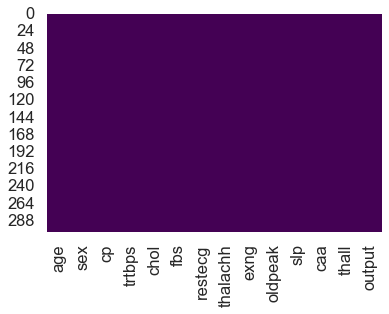

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') #check for missing data using seaborn heatmap

In [ ]:
sum(df.duplicated(keep='first'))

1

<AxesSubplot:xlabel='thall', ylabel='count'>

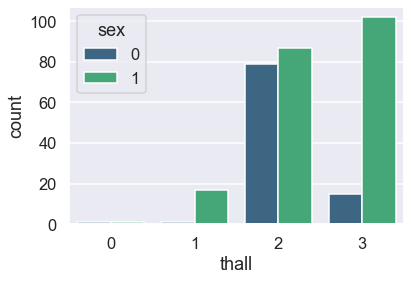

In [ ]:
sns.countplot(x='thall', data=df, hue='sex', palette='viridis')

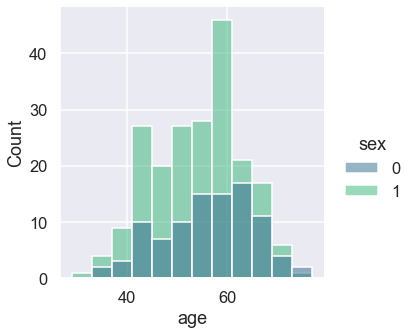

In [ ]:
sns.displot(x='age', data=df, hue='sex', palette='viridis')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'chol'}>]], dtype=object)

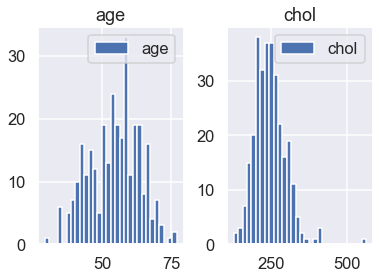

In [ ]:
df[['age', 'chol']].hist(bins=30, legend = True)

In [ ]:
X = df.drop('sex', axis=1)
y = df['sex']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\Engr. Mike Sam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.43      0.37      0.40        27
           1       0.78      0.82      0.80        73

    accuracy                           0.70       100
   macro avg       0.61      0.60      0.60       100
weighted avg       0.69      0.70      0.69       100

[[10 17]
 [13 60]]
